In [13]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns


 SQL Server database connection

In [14]:

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

query = 'SELECT * FROM RelationshipSickLeaveAndJobTitle;'

Creating DataFrame in order to manipulate the data queried 

In [15]:

df = pd.read_sql(query, conn)
grouped_df = df.groupby('JobTitle')['SickLeaveHours'].mean().reset_index()

# Sort the DataFrame by 'SickLeaveHours' for better visualization
grouped_df = grouped_df.sort_values('SickLeaveHours')

C:\Users\eagua\AppData\Local\Temp\ipykernel_23936\3982032262.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In the following code, we'll dive into the average of sick leave hours of job titles in Adventureworks, the average is lower in manager positions.

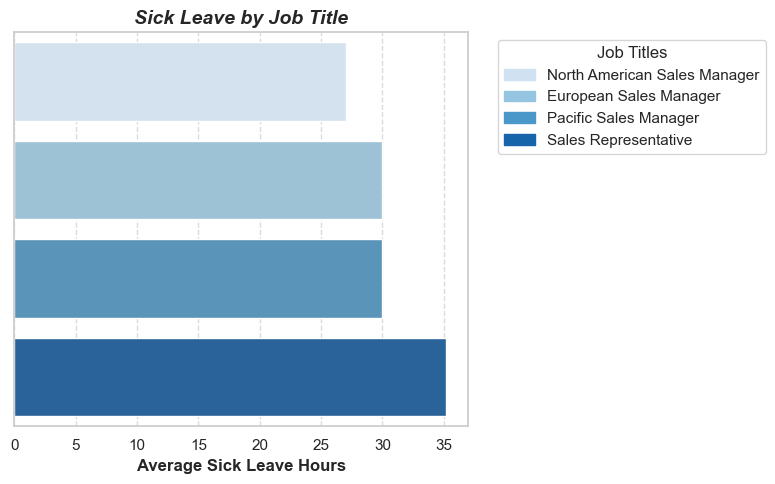

In [16]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the figure with a smaller size
plt.figure(figsize=(8, 5))

# Create a gradient color palette
palette = sns.color_palette("Blues", len(grouped_df))

# Create horizontal bar chart with gradient colors
bar_plot = sns.barplot(x='SickLeaveHours', y='JobTitle', data=grouped_df, palette=palette, dodge=False)

# Create legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(palette, grouped_df['JobTitle'])]

# Add labels and title with modified font size and style
plt.xlabel('Average Sick Leave Hours', fontsize=12, fontweight='bold')
plt.ylabel('')  # Remove y-label for cleaner look
plt.title('Sick Leave by Job Title', fontsize=14, fontweight='bold', fontstyle='italic')

# Remove y-tick labels for a cleaner look
plt.yticks([], [])

# Add gridlines for x-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the legend
plt.legend(handles=legend_patches, title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



Now, there's a comparison between genders in sales representative, as the sample of female using sick hours is lower, there's only a few ones in high end of the spectrum of others in the lower one.

C:\Users\eagua\AppData\Local\Temp\ipykernel_23936\2042537775.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


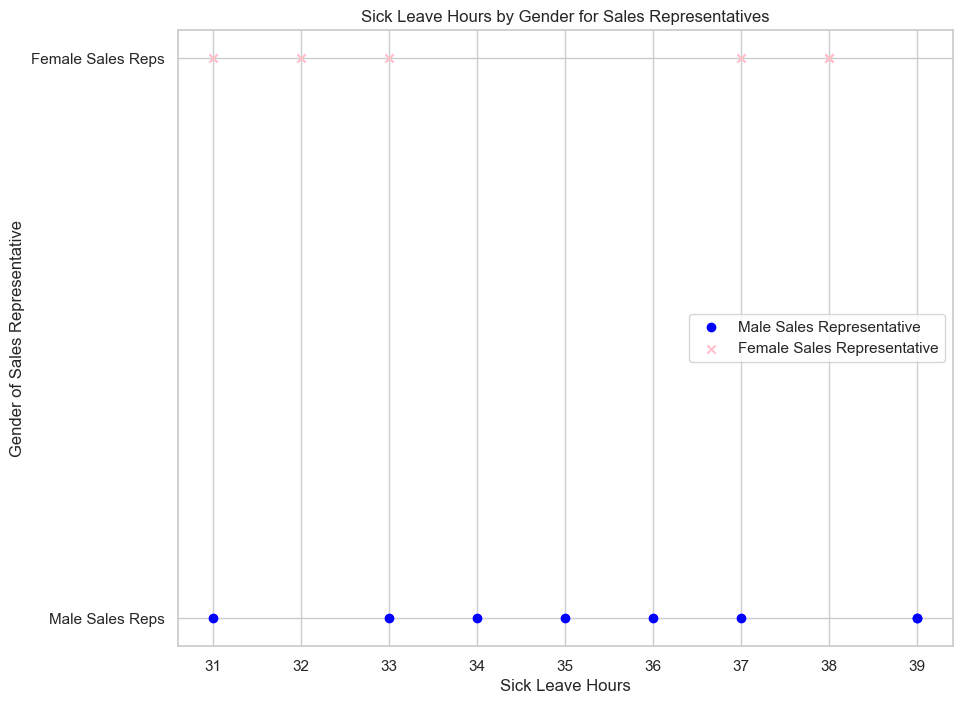

In [17]:
df = pd.read_sql(query, conn)
df_sales_rep = df[df['JobTitle'] == 'Sales Representative']

# Filter sales representatives by gender
df_sales_rep_male = df_sales_rep[df_sales_rep['Gender'] == 'M']
df_sales_rep_female = df_sales_rep[df_sales_rep['Gender'] == 'F']

# Create the figure and axis
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Scatter plot for Male Sales Representatives
ax.scatter(df_sales_rep_male['SickLeaveHours'], [1] * len(df_sales_rep_male), color='blue', label='Male Sales Representative', marker='o')

# Scatter plot for Female Sales Representatives
ax.scatter(df_sales_rep_female['SickLeaveHours'], [2] * len(df_sales_rep_female), color='pink', label='Female Sales Representative', marker='x')

# Set labels and title
plt.xlabel('Sick Leave Hours')
plt.ylabel('Gender of Sales Representative')
plt.yticks([1, 2], ['Male Sales Reps', 'Female Sales Reps'])
plt.title('Sick Leave Hours by Gender for Sales Representatives')

# Add legend
plt.legend()

# Show the plot
plt.show()


The final graph including both charts is shown below.

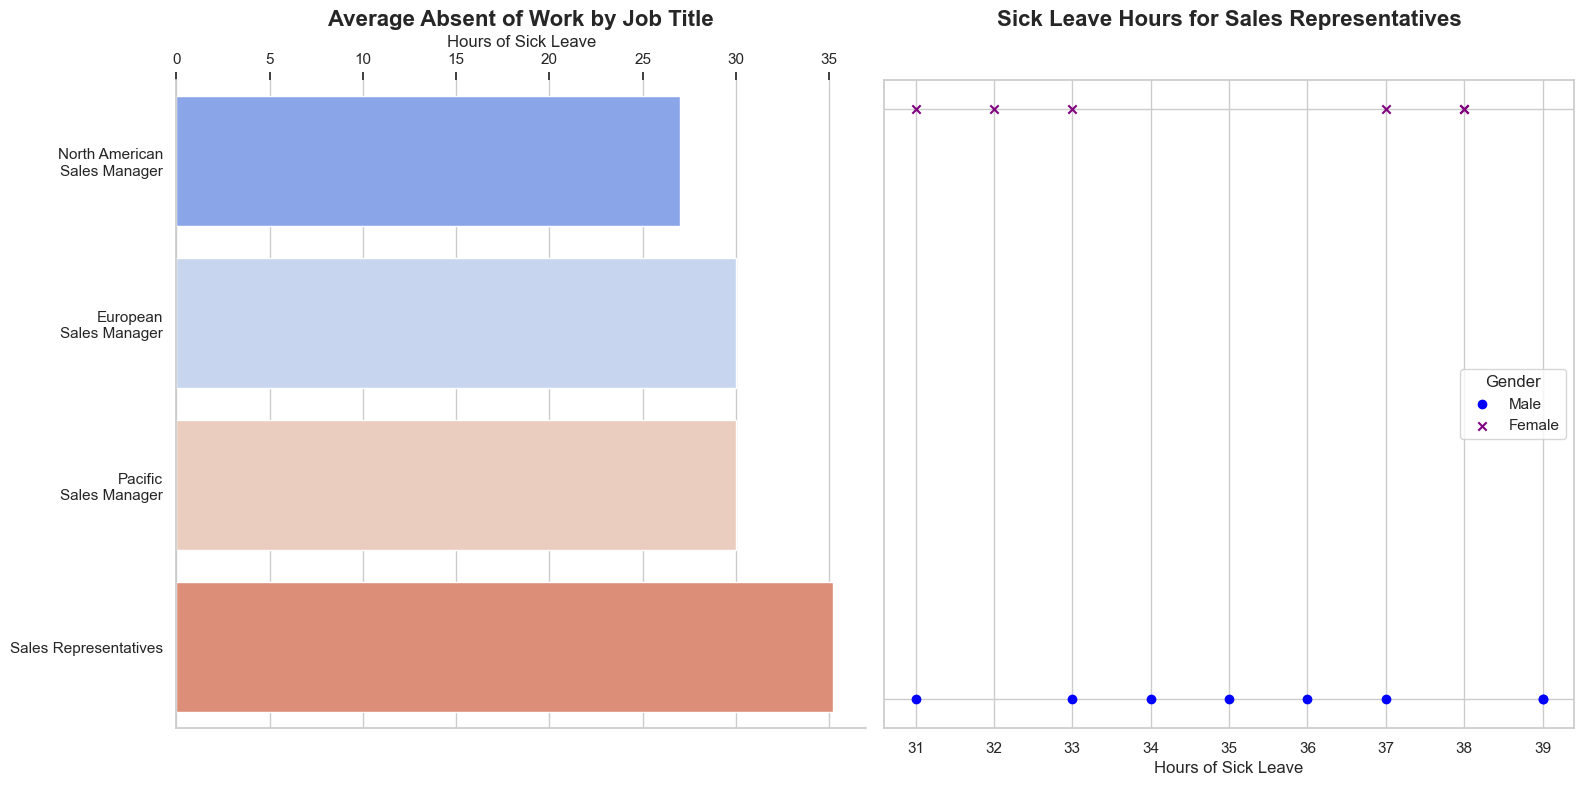

In [18]:
# Create a figure
fig = plt.figure(figsize=(16, 8))

# Create the first subplot for the bar chart
ax1 = plt.subplot(1, 2, 1)

# Create the bar chart
sns.barplot(x='SickLeaveHours', y='JobTitle', data=grouped_df, ax=ax1, palette="coolwarm")
sns.despine(ax=ax1)

# Customize the bar chart
ax1.set_title('Average Absent of Work by Job Title', fontsize=16, fontweight='bold', y=1.07)
ax1.set_ylabel('')
ax1.set_xlabel('Hours of Sick Leave')
ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()
ax1.set_yticklabels(['North American\nSales Manager', 'European\nSales Manager', 'Pacific\nSales Manager','Sales Representatives'])

# Create the second subplot for the scatter plot
ax2 = plt.subplot(1, 2, 2)

# Create the scatter plot
ax2.scatter(df_sales_rep_male['SickLeaveHours'], [1] * len(df_sales_rep_male), color='blue', label='Male', marker='o')
ax2.scatter(df_sales_rep_female['SickLeaveHours'], [2] * len(df_sales_rep_female), color='purple', label='Female', marker='x')

# Customize the scatter plot
ax2.set_xlabel('Hours of Sick Leave', fontsize=12)
ax2.set_title('Sick Leave Hours for Sales Representatives', fontsize=16, fontweight='bold', y=1.07)
ax2.set_yticks([1, 2])
ax2.set_yticklabels(['', ''], fontsize=12)
ax2.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()
